In [1]:
cd"/Users/cindyngo/Desktop/QBUS3830/Team Project"

/Users/cindyngo/Desktop/QBUS3830/Team Project


# Importing Packages & Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.despine()
sns.set_context('talk', font_scale = 1)
import statsmodels.formula.api as smf
import os

In [3]:
def InitiateData():
    '''
    Imports the data set and prepare it for EDA and modelling
    '''
    global data
    
    data = pd.read_excel('default of credit card clients.xls', header=1, index_col=0)

    col_names = ['Balance', 'Sex', 'Education', 'Marriage', 'Age',
                'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr',
                'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
                'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr',
                'Default']
    data.columns = col_names
    data = data.astype(str).astype(int)
    
    return data.head()

InitiateData()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,...,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cleaning Data

## Analysis of missing data

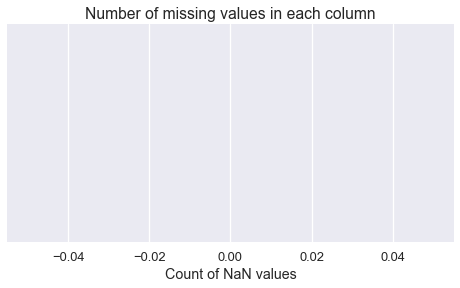

In [4]:
# Identifying missing data 
missing_data = data.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]
missing_data = missing_data.sort_values(by = 'missing_count')
ind = np.arange(missing_data.shape[0])

fig, ax = plt.subplots(figsize = (8,4))
rects = ax.barh(ind, missing_data.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_data.column_name.values, rotation = 'horizontal')
ax.set_xlabel("Count of NaN values")
ax.set_title("Number of missing values in each column")
plt.show()

# Exploratory Data Analysis

In [5]:
# Separation of variables into different data types
response = ['Default']

continuous = ['Balance',
              'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
              'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr']

categorical = ['Sex', 'Education', 'Marriage',
              'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr']

discrete = ['Age']

predictors = continuous + categorical + discrete

In [6]:
data.describe().round(2)

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,...,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


Nothing too interesting:

* NB: 1AUD ~ 20NT
* 81 different credit balance tiers
* education has 7 unique values but only 4 in the descrption?
* marriage has 4 uniques but only 3 in description?
* age range of 56 years
* PAY (payment status): -1 means paid fully for the corresponding bill, 0 no payment (yet), 1,2,...,8 means payment late
* Current bill and previous payment - so if fully paid, a bill in August will match the payment in September

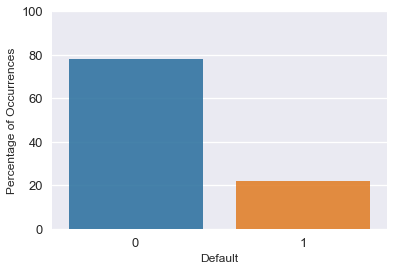

0    77.9
1    22.1
Name: Default, dtype: float64

In [7]:
# Percentage of Responses 
fig = plt.figure()
default_count = data['Default'].value_counts(normalize=True).round(3)*100
sns.barplot(default_count.index, default_count.values, alpha=0.9)
plt.ylabel('Percentage of Occurrences', fontsize=12)
plt.xlabel('Default', fontsize=12)
plt.ylim(0,100)    
plt.show()

default_count

22.1% of responses are defaults - this is an imbalanced class problem

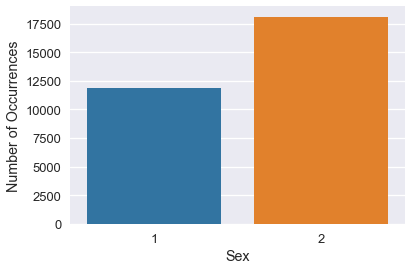

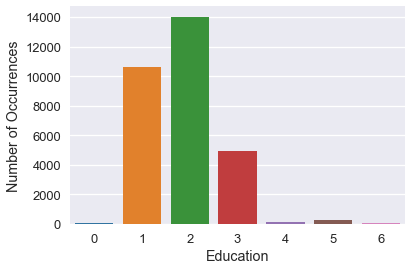

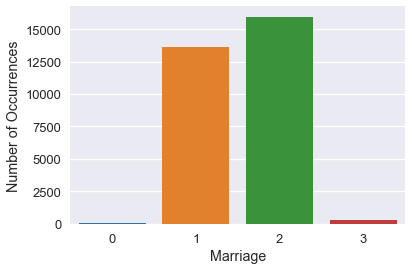

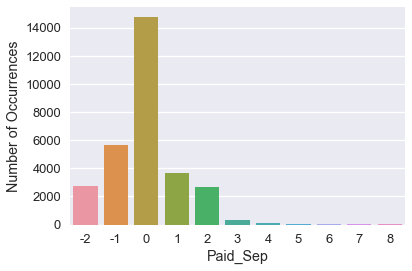

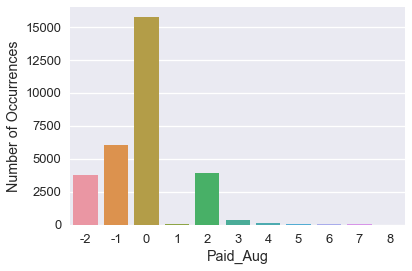

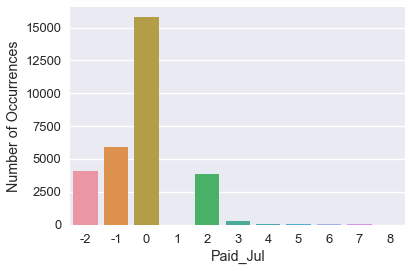

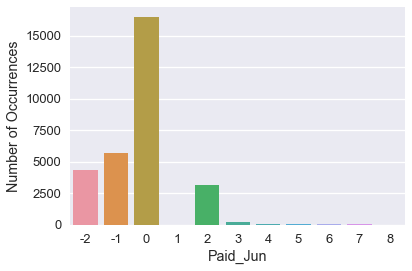

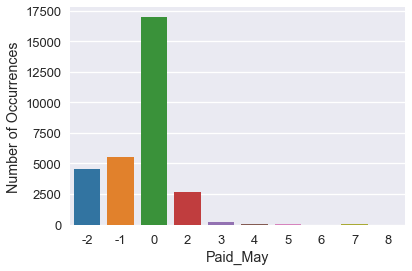

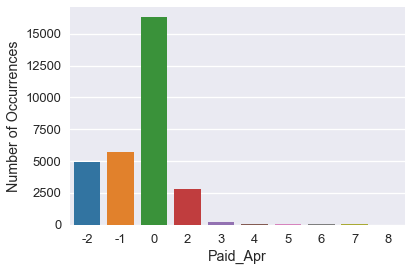

In [8]:
# Barplots for each categorical variable 
for item in categorical: 
    fig,ax = plt.subplots()
    item_count = data[item].value_counts()
    sns.barplot(item_count.index, item_count.values)
    plt.ylabel('Number of Occurrences')
    plt.xlabel(item)
    plt.show()

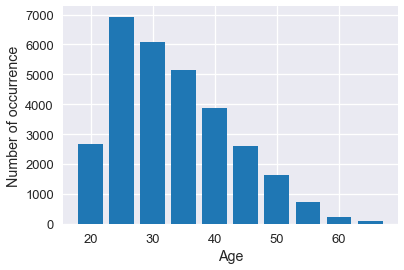

In [9]:
bins = [20,25,30,35,40,45,50,55,60,65,70]

plt.hist(data['Age'], bins, histtype='bar', rwidth=0.8, align='left', orientation='vertical')
plt.xlabel('Age')
plt.ylabel('Number of occurrence')
plt.show()

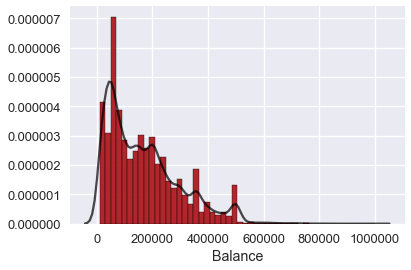

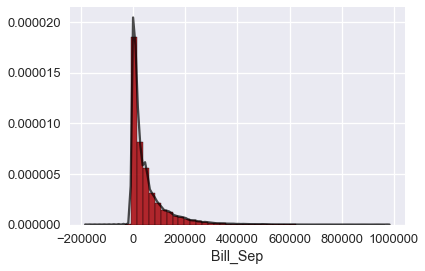

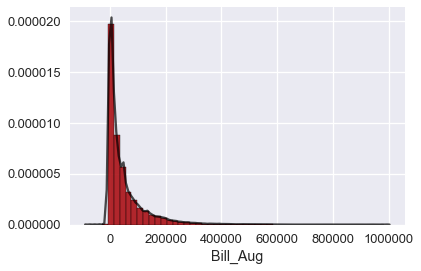

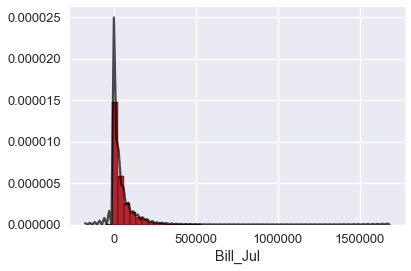

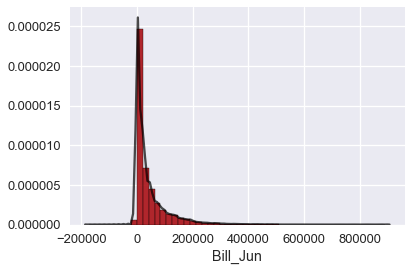

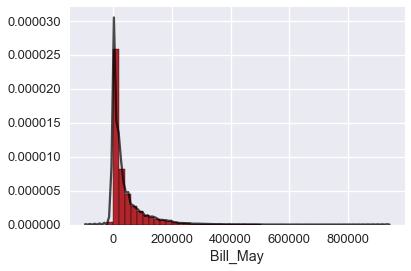

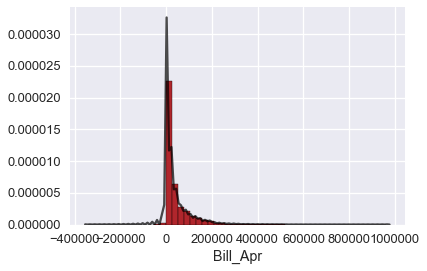

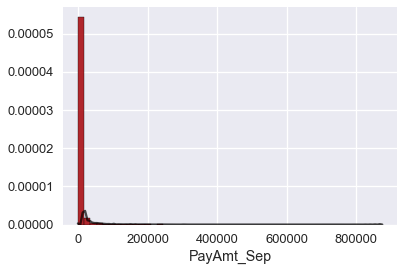

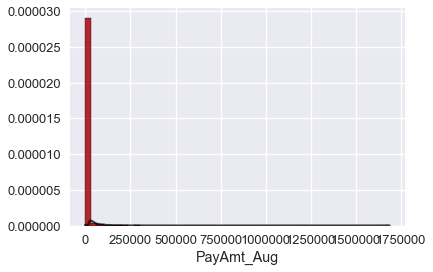

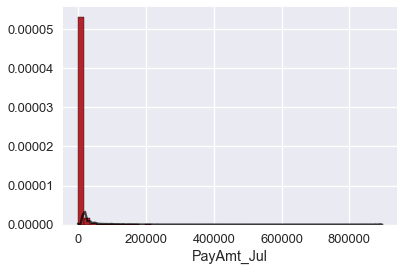

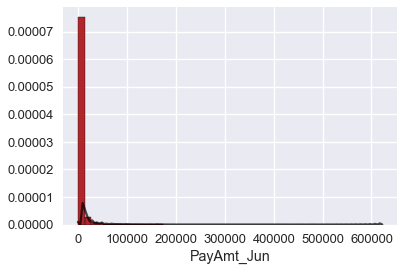

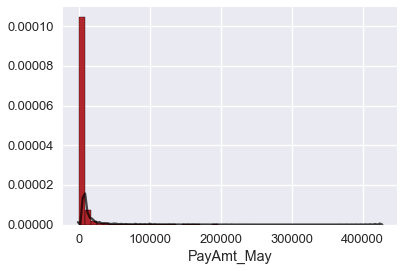

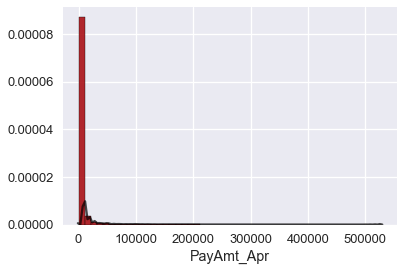

In [10]:
# Histograms for  continuous variables 
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Reds')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return plt.show()

for item in continuous:
    hist(data[item])

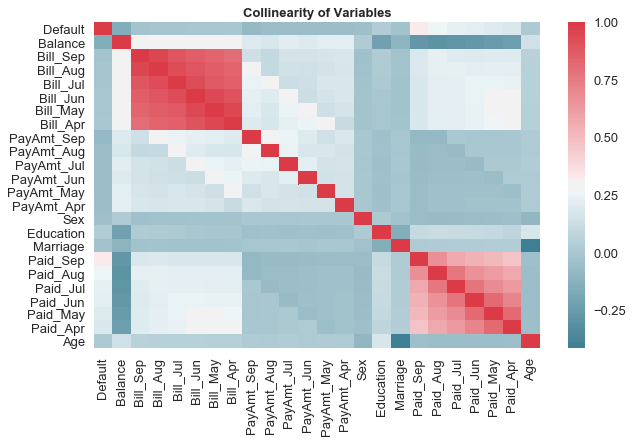

In [11]:
# Correlation matrix for all variables 
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns. diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[response+predictors].corr(), ax=ax, cmap=cmap)
ax.set_title('Collinearity of Variables', fontweight='bold', fontsize=13)
plt.show()

In [12]:
# List correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('Paid_Aug', 'Paid_Jul'),
 ('Paid_Jul', 'Paid_Jun'),
 ('Paid_Jun', 'Paid_May'),
 ('Paid_May', 'Paid_Apr'),
 ('Bill_Sep', 'Bill_Aug'),
 ('Bill_Sep', 'Bill_Jul'),
 ('Bill_Sep', 'Bill_Jun'),
 ('Bill_Sep', 'Bill_May'),
 ('Bill_Sep', 'Bill_Apr'),
 ('Bill_Aug', 'Bill_Jul'),
 ('Bill_Aug', 'Bill_Jun'),
 ('Bill_Aug', 'Bill_May'),
 ('Bill_Aug', 'Bill_Apr'),
 ('Bill_Jul', 'Bill_Jun'),
 ('Bill_Jul', 'Bill_May'),
 ('Bill_Jul', 'Bill_Apr'),
 ('Bill_Jun', 'Bill_May'),
 ('Bill_Jun', 'Bill_Apr'),
 ('Bill_May', 'Bill_Apr')]

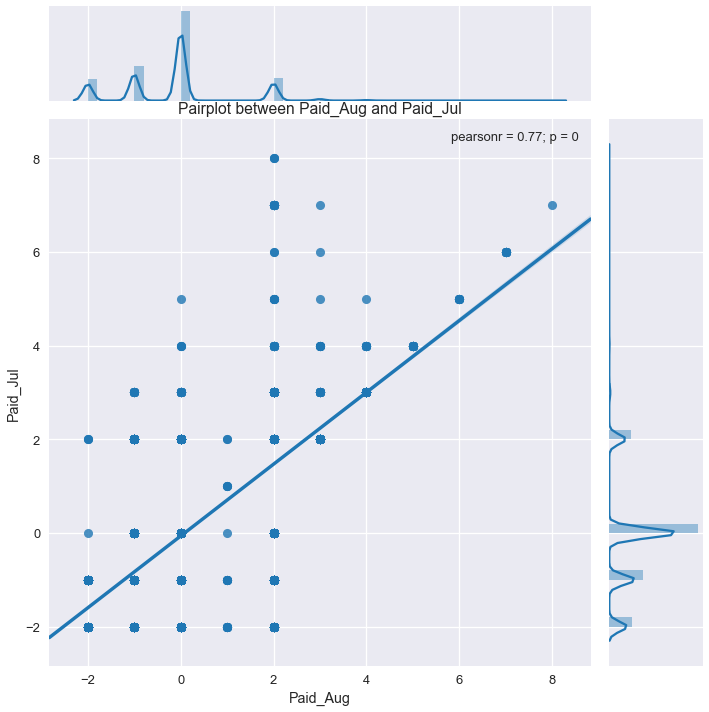

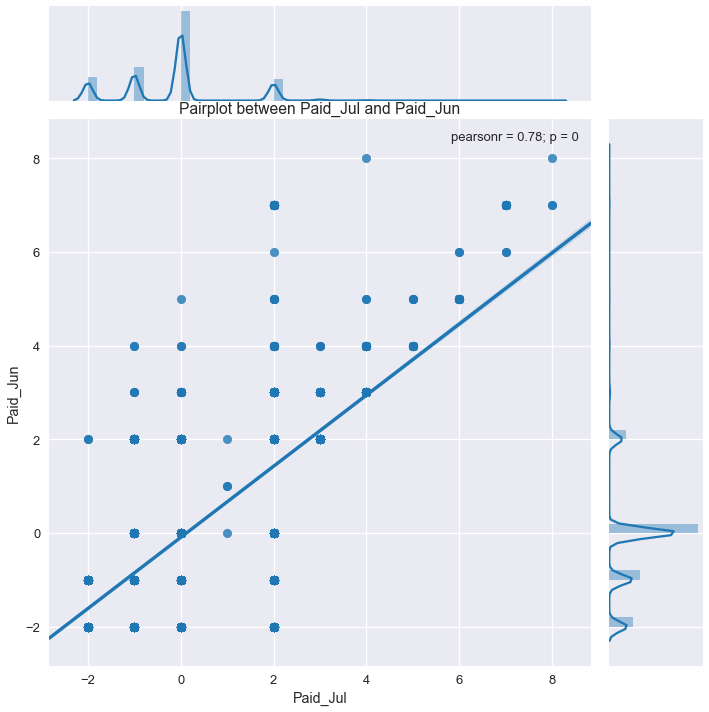

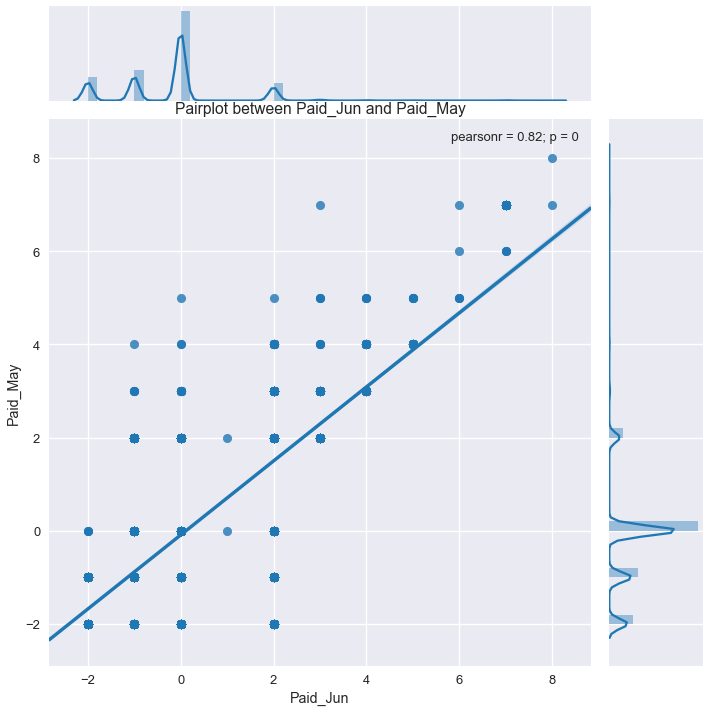

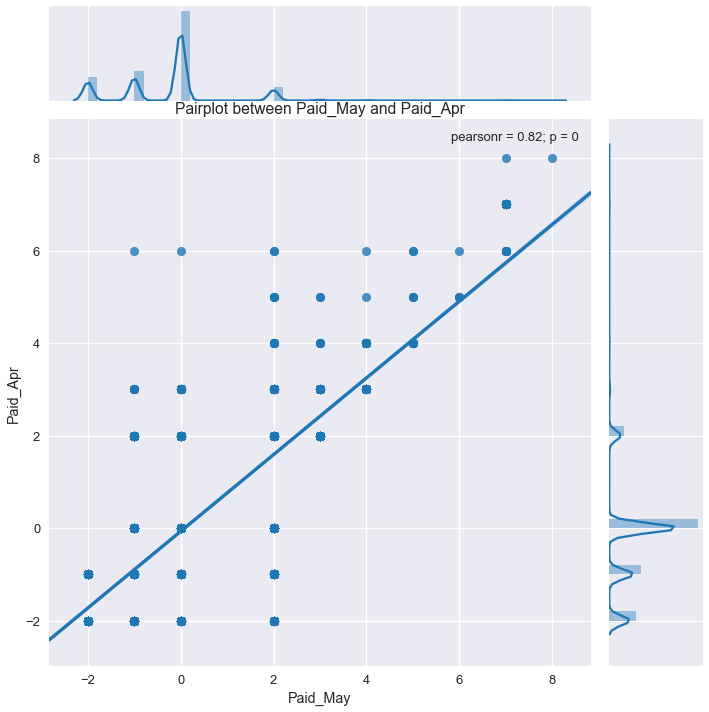

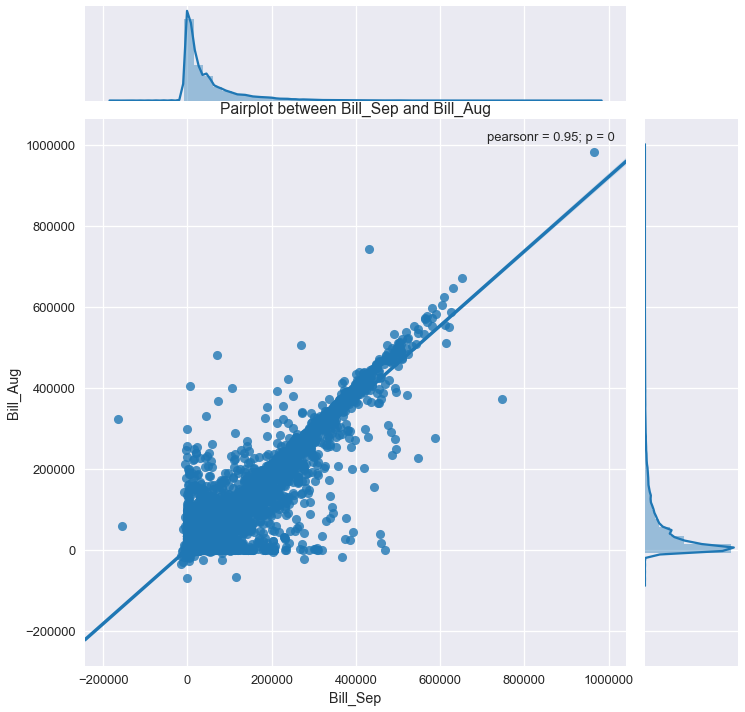

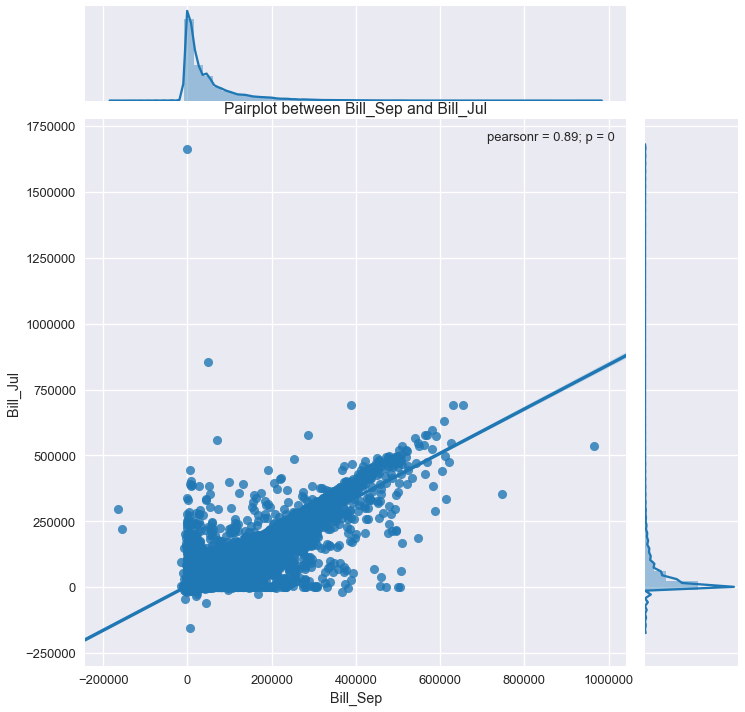

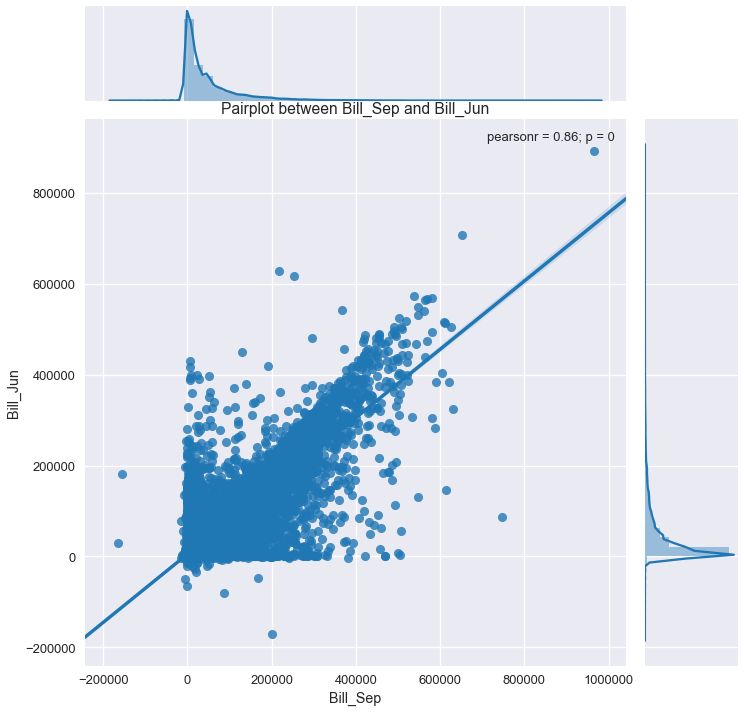

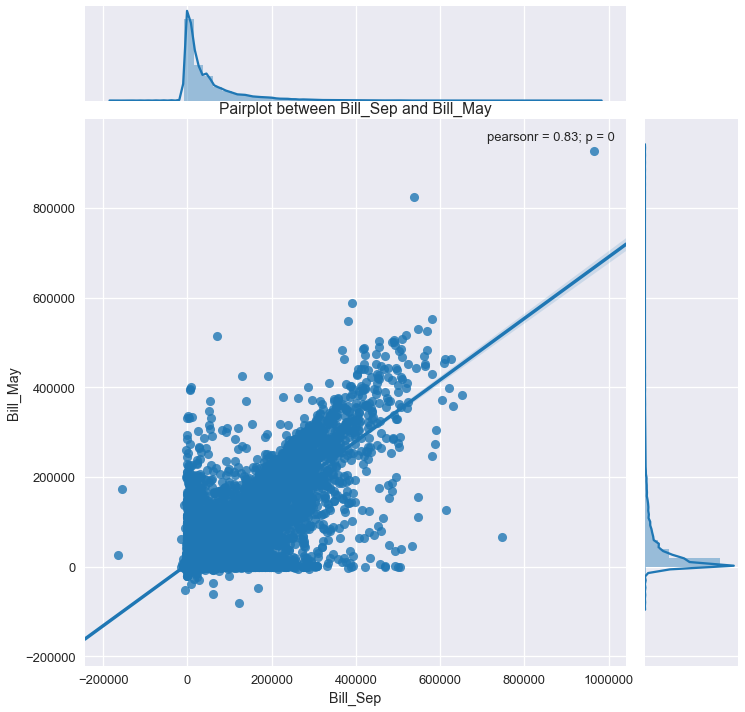

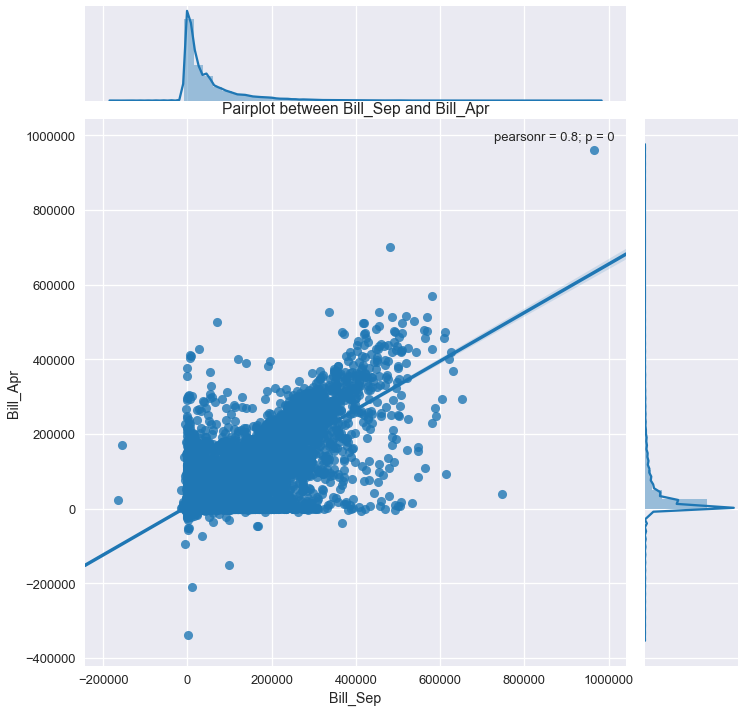

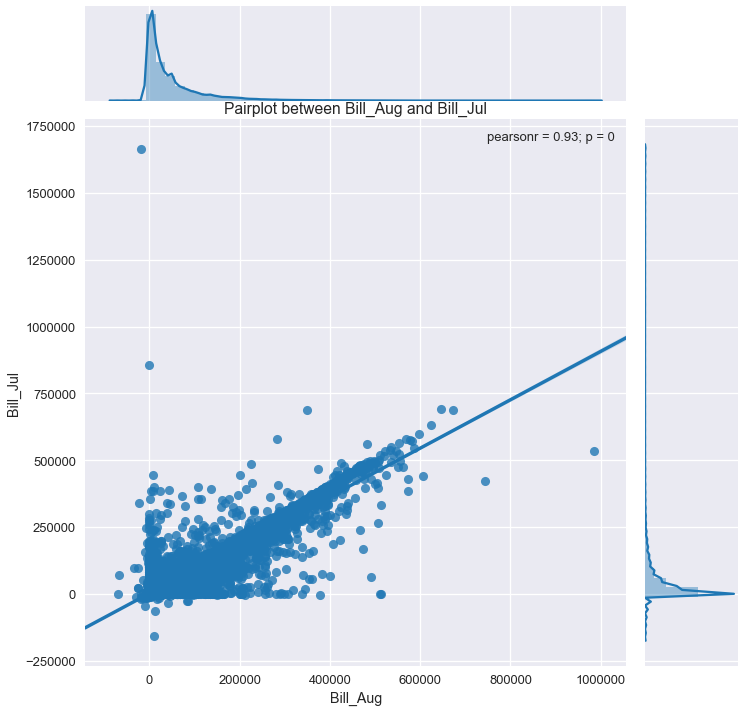

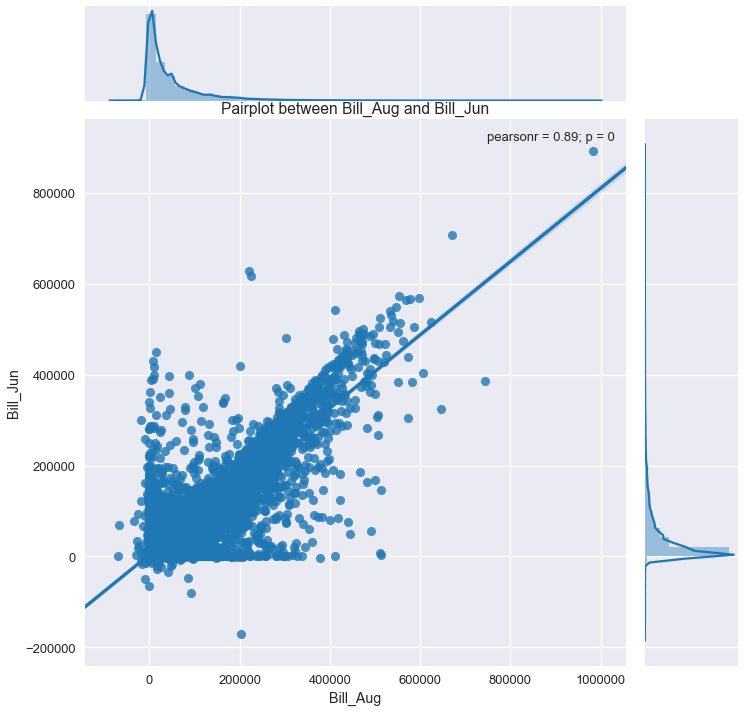

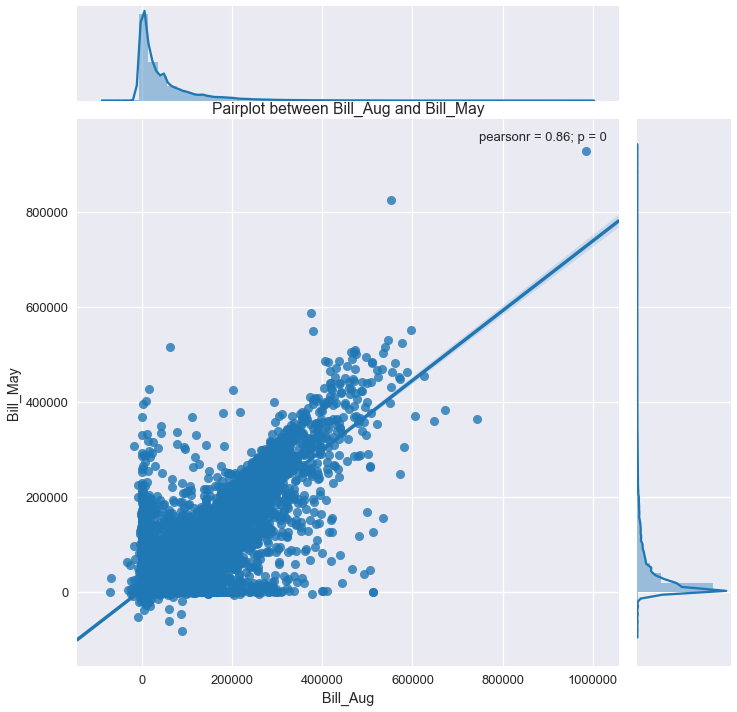

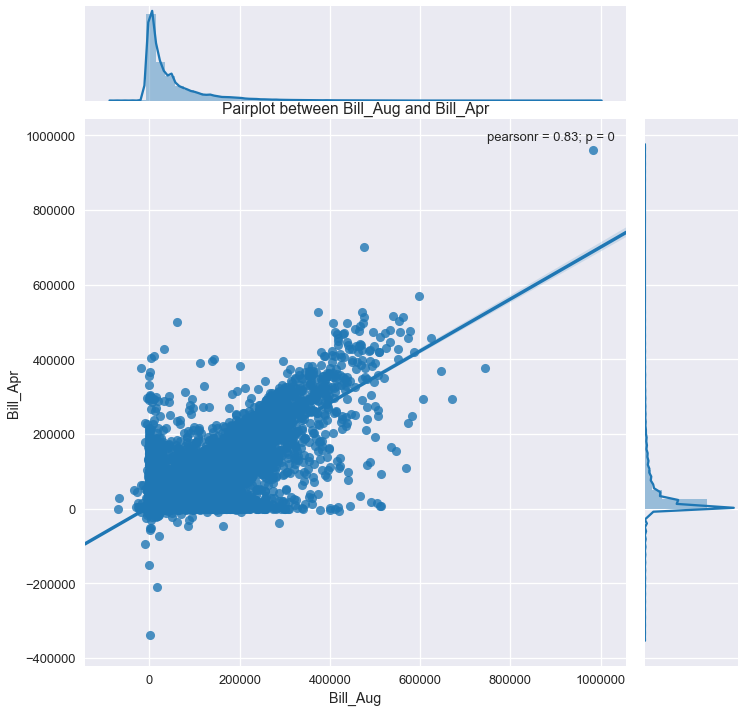

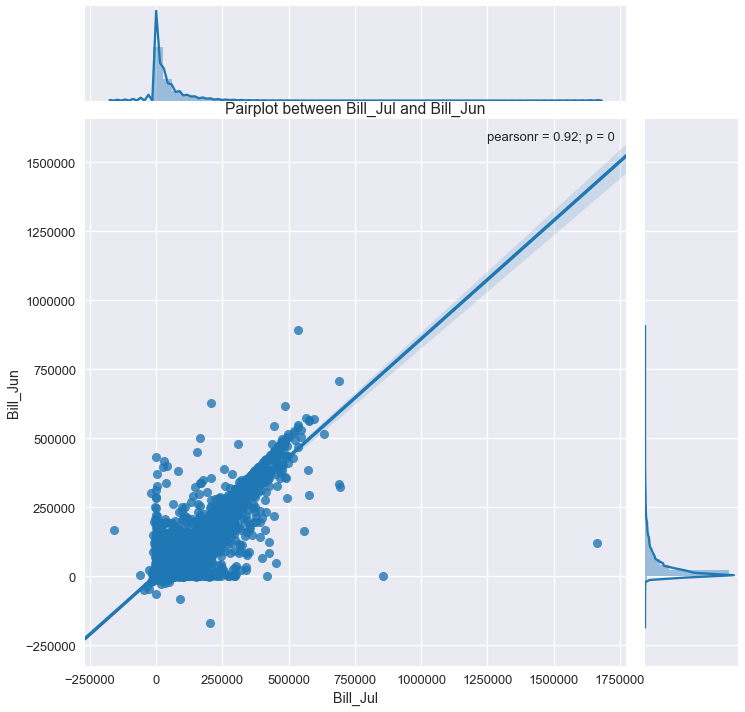

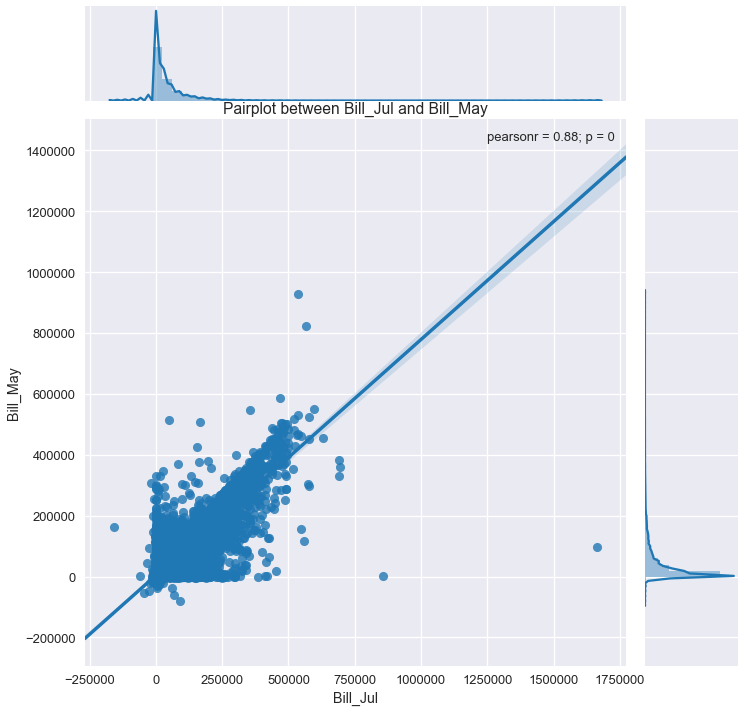

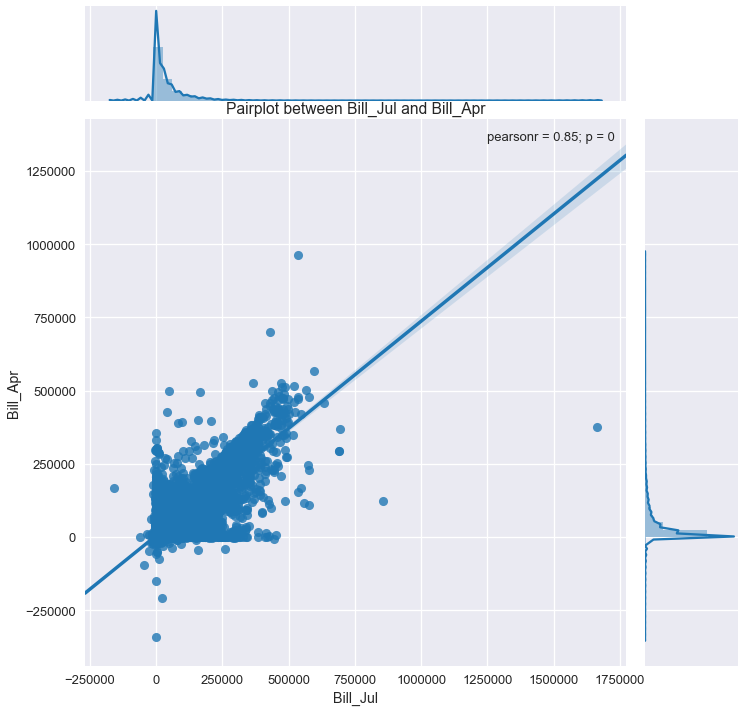

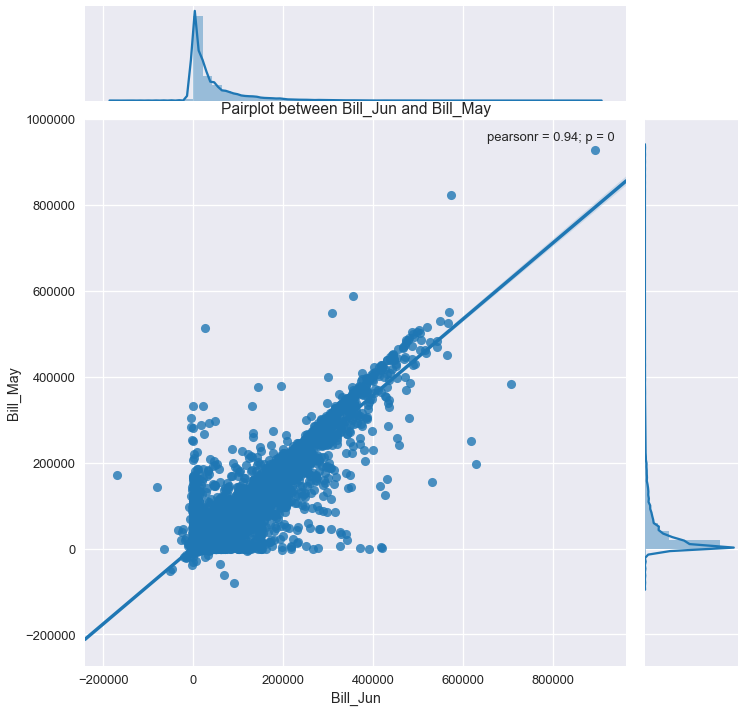

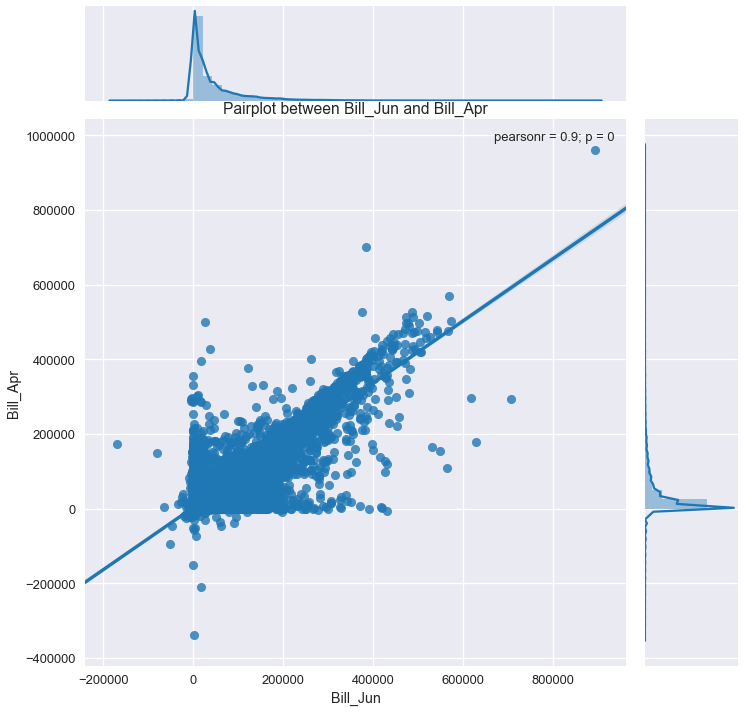

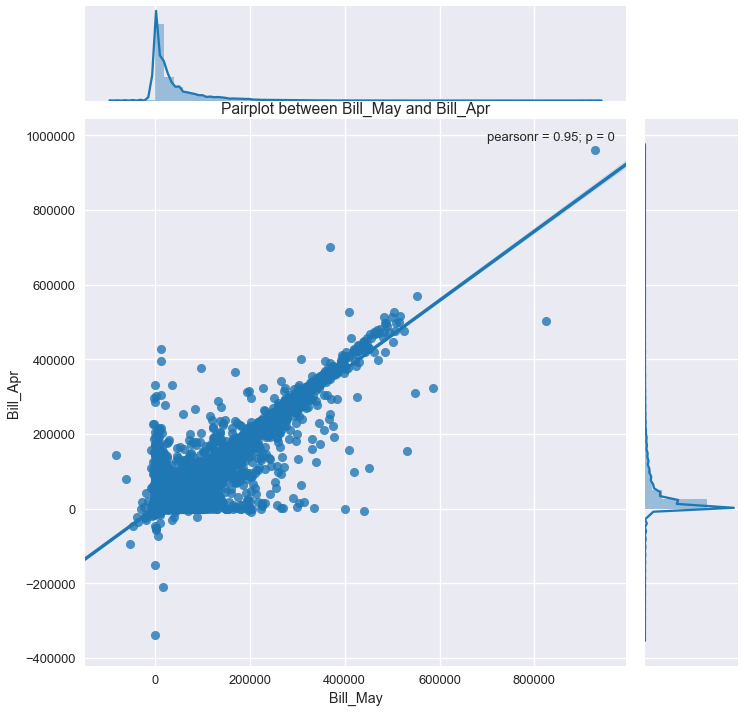

In [13]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

In [14]:
# Tests for skewness of data, to determine whether to scale with median or mean
from scipy.stats import skewtest
skewed = []
non_skewed = []

for i in continuous+discrete:
    p = skewtest(data[i], nan_policy='omit')[1] # calculates skewtest p_value (H0 = normally distributed)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)
        
print('Skewed variables are:\n{0}\n\nNon-skewed variables are:\n{1}'.format(skewed, non_skewed))

Skewed variables are:
['Balance', 'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr', 'Age']

Non-skewed variables are:
[]


Data all seems skewed, probably because of the zero-inflated data. 
Either transform with LOG or POWER

In [15]:
# Non-parametric Kruskal-Wallis ANOVA rank test - to determine class independence
from scipy.stats import kruskal
H = []
p = []

for i in categorical+discrete:
    h, pval = kruskal(*[data.loc[data[i]==v,'Default'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns=['H Stat'], index=categorical+discrete)
table['p values'] = pd.DataFrame(p, index=categorical+discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index=categorical+discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
Sex,47.90,0.0,True
Education,163.21,0.0,True
Marriage,35.66,0.0,True
Paid_Sep,5365.79,0.0,True
Paid_Aug,3474.35,0.0,True
Paid_Jul,2622.37,0.0,True
Paid_Jun,2341.39,0.0,True
Paid_May,2197.62,0.0,True
Paid_Apr,1886.77,0.0,True
Age,158.55,0.0,True


In [16]:
# Calculating VIF for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
pred = continuous + discrete

X = data[pred].as_matrix()

VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, 
                   columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2)

,SQRT(VIF)
Bill_Aug,6.17
Bill_May,5.99
Bill_Jul,5.63
Bill_Jun,5.42
Bill_Apr,4.61
Bill_Sep,4.54
Balance,1.79
Age,1.66
PayAmt_Aug,1.54
PayAmt_Sep,1.37


In [17]:
# Cross-tabulation of Sex & Default
sex_default = pd.crosstab(data['Default'], data['Sex'], margins=True, normalize='columns')

# Default
row = {0: 'Non-default', 1: 'Default', }
# Sex
column = {1: 'Male', 2: 'Female'}

sex_default.rename(index=row, columns=column, inplace=True)
sex_default

Sex,Male,Female,All
Default,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212


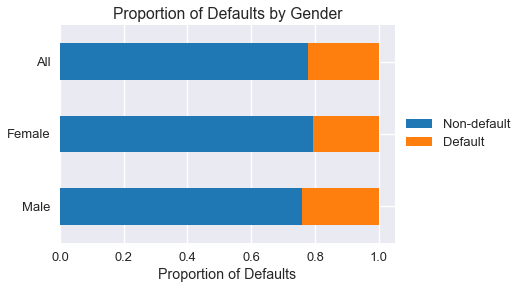

In [18]:
# Plot cross-tabulation
fig, ax = plt.subplots()

sex_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Gender')
plt.xlabel('Proportion of Defaults')
plt.show()

In [19]:
# Cross-tabulation of Education & Default
educ_default = pd.crosstab(data['Default'], data['Education'], margins=True, normalize='columns')

# Default
row = {0: 'Non-default', 1: 'Default', }
# Education
column = {1: 'Graduate school', 2: 'University', 3: 'High school', 4: 'Others', 0: 'NA(0)', 5: 'NA(5)', 6: 'NA(6)'}

educ_default.rename(index=row, columns=column, inplace=True)
educ_default

Education,NA(0),Graduate school,University,High school,Others,NA(5),NA(6),All
Default,,,,,,,,
Non-default,1.0,0.807652,0.762651,0.748424,0.943089,0.935714,0.843137,0.7788
Default,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863,0.2212


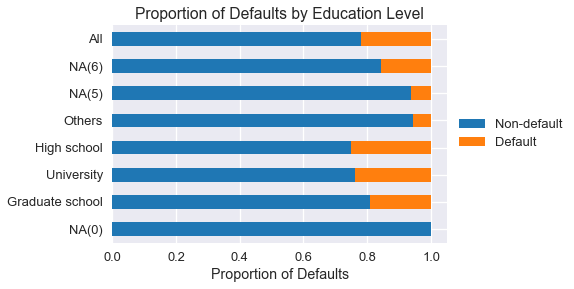

In [20]:
# Plot cross-tabulation
fig, ax = plt.subplots()

educ_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Education Level')
plt.xlabel('Proportion of Defaults')
plt.show()

In [21]:
# Cross-tabulation of Marriage & Default
marr_default = pd.crosstab(data['Default'], data['Marriage'], margins=True, normalize='columns')

# Default
row = {0: 'Non-default', 1: 'Default', }
# Marriage 
column = {1: 'Married', 2: 'Single', 3: 'Others', 0: 'NA'}

marr_default.rename(index=row, columns=column, inplace=True)
marr_default

Marriage,NA,Married,Single,Others,All
Default,,,,,
Non-default,0.907407,0.765283,0.790717,0.739938,0.7788
Default,0.092593,0.234717,0.209283,0.260062,0.2212


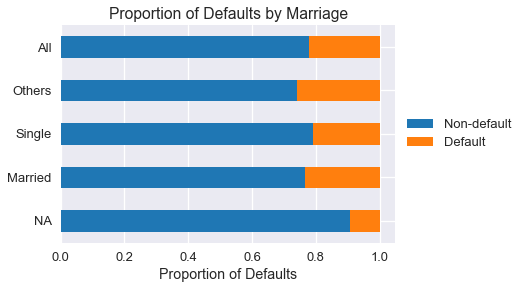

In [22]:
# Plot cross-tabulation
fig, ax = plt.subplots()

marr_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Marriage')
plt.xlabel('Proportion of Defaults')
plt.show()

In [23]:
#import scipy
#for i in continuous:
#    scipy.stats.boxcox(data[i])[0]
#    hist(data[i])
    
# Box Cox transformation won't work for negative values - figure this out later

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Label response and predictors
response =['Default']
predictors = [x for x in list(data.columns) if x not in response]

# Step 2: Split data set
y = data[response].copy()
X = data[predictors].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Prepare for scaling
scaler = StandardScaler().fit(X_train)

# Step 4: Scale the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Decision Trees

In [25]:
# max_depth = 2
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

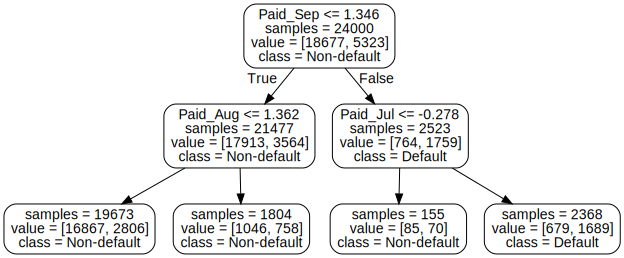

In [26]:
import graphviz
from sklearn.tree import export_graphviz

d_tree1 = export_graphviz(tree1, out_file=None, feature_names=predictors, impurity=False,
                           class_names=['Non-default','Default'], rounded=True) 
graph1 = graphviz.Source(d_tree1)
#graph.render('tree01') # saves tree to a file
graph1

If increase max_depth=4, graph does not fit into the window properly. I can't find a way to reduce the size.

Select the depth and minimum node size using the automated GridSearchCV funtion for this purpose.

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = DecisionTreeClassifier(criterion='entropy')

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20,30,40,50],
}

tree_search = GridSearchCV(model, tuning_parameters, cv=5 , return_train_score=False)
tree_search.fit(X_train, y_train)

tree2 = tree_search.best_estimator_

print('Best parameters found by grid search:', tree_search.best_params_, '\n')

Best parameters found by grid search: {'min_samples_leaf': 50} 



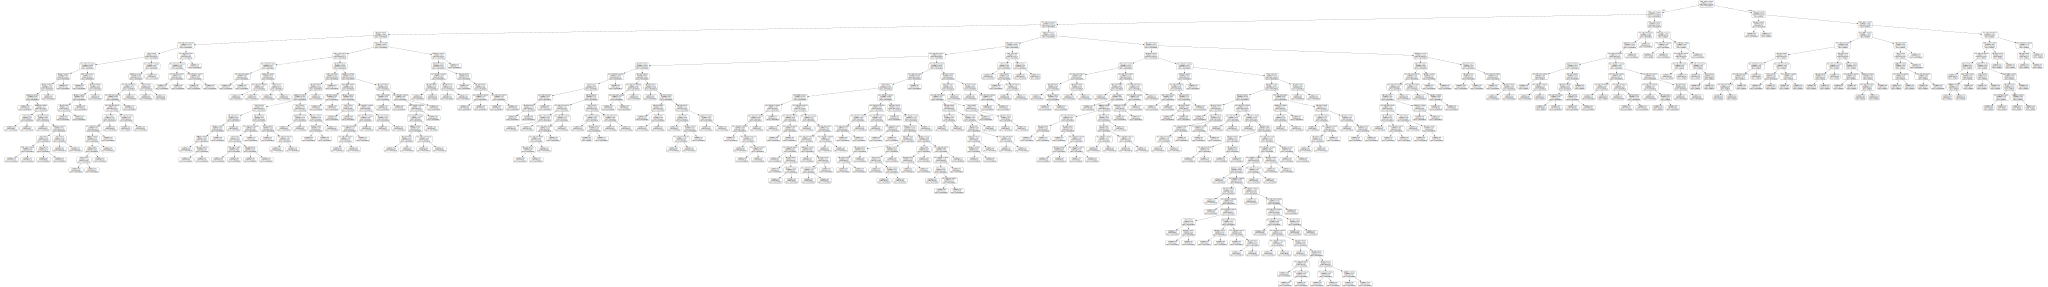

In [28]:
d_tree2 = export_graphviz(tree2, out_file=None, feature_names=predictors, impurity=False,
                           class_names=['Non-default','Default'], rounded=True) 
graph2 = graphviz.Source(d_tree2)
#graph.render('tree02') # saves tree to a file
graph2
# COMPRESS GRAPH SIZE

# Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=1000, random_state=1)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

# Random Forest

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_features= 2, min_samples_leaf=5, n_estimators=1000, 
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

To tune the random forest, select a parameter that controls the size of the trees (such as the minimum number of observations in a terminal node) and the number of predictors that are sampled as candidate split variables at each node of a tree.

In [ ]:
%%time

model = RandomForestClassifier(criterion='entropy',  n_estimators=1000)

tuning_parameters = {
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_features': np.arange(1, len(predictors)+1),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, cv=5, n_iter=16, return_train_score=False, n_jobs=-1)
rf_search.fit(X_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

In [ ]:
rf.n_estimators = 10000
rf.fit(X_train, y_train) 

In [ ]:
from statlearning import plot_feature_importance
plot_feature_importance(rf, predictors)
plt.show()

# K-Nearest Neighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def knn_cv(X_train, y_train):
    
    neighbours = np.arange(1, 51)
    best_score = 0
    
    for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k ,  metric='mahalanobis', metric_params={'V': X_train.cov()})
        score = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy'))
        if score >= best_score:
            best = knn
            best_score = score
    
    return best
        
knn = knn_cv(X_train, y_train) 
knn.fit(X_train, y_train)

# Model Stacking

In [ ]:
# Idk how to put logistic regression as the meta_classifier 
    # Been trying to find that out but haven't found out that yet
    # Could be "lr" but idk if that means logistic regression
    # I believe it is based on this (https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/#example-3-stacked-classification-and-gridsearch)
        # Look at this example's output 

#%%time
#
#from mlxtend.classifier import StackingClassifier
#
#models = [tree1, tree2, bag, rf]
#
#stack = StackingClassifier(models, meta_classifier=lr, cv=10)
#stack.fit(X_train.values, y_train.ravel())

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns = ['Error rate', 'True Positive Rate', 'True Negative Rate', 'AUC', 'Precision']
rows = ['Decision Tree 1', 'Decision Tree 2', 'Bagged Trees', 'Random Forest', 'KNN']
results = pd.DataFrame(0.0, columns=columns, index=rows) 

methods = [tree1, tree2, bag, rf, knn]

y_prob = np.zeros((len(test), len(rows)))

for i, method in enumerate(methods):
    
    y_pred = method.predict(X_test)
    y_prob[:, i] = method.predict_proba(X_test)[:,1]

    confusion = confusion_matrix(y_test, y_pred) 

    results.iloc[i,0] = 1 - accuracy_score(y_test, y_pred)
    results.iloc[i,1] = confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,2] = confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,3] = roc_auc_score(y_test, y_prob[:,i])
    results.iloc[i,4] = precision_score(y_test, y_pred)

results.round(3)

In [ ]:
# Plot ROC curves
from statlearning import plot_roc_curves

with sns.color_palette(crayon):
    fig, ax = plot_roc_curves(y_test, y_prob, labels=pd.Series(rows))
    plt.show()